In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image
from keras.models import load_model
from keras_preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input

from pathlib import Path

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = load_model("/content/drive/MyDrive/forestfire/models/model_less_forest.h5")  # Path to model

In [ ]:
directory = "/content/drive/MyDrive/forestfire/data/"  # Path to images
FIRE = "full-fire"
NONFIRE = "nonfire"
prediction_list = []
labels = {0: 'fire', 1: 'nonfire'}

"""
for file in os.listdir(directory + FIRE):
    img_dir = os.path.join(directory + FIRE, file)
    
    if os.path.isfile(img_dir):
        my_image = load_img(img_dir, target_size=(250, 250))
 
        my_image = img_to_array(my_image)
        my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
        my_image = preprocess_input(my_image)

        prediction = model.predict(my_image)
        prediction = np.argmax(prediction, axis=1)[0]
        
        prediction = labels[prediction]

        prediction_list.append([file, prediction, 'fire'])
"""
# directory = '/content/drive/MyDrive/forestfire/data'  # Path to images

for file in os.listdir(directory + NONFIRE):
    img_dir = os.path.join(directory + NONFIRE, file)
    
    if os.path.isfile(img_dir):
        my_image = load_img(img_dir, target_size=(250, 250))

        my_image = img_to_array(my_image)
        my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
        my_image = preprocess_input(my_image)

        prediction = model.predict(my_image)
        prediction = np.argmax(prediction, axis=1)[0]
        
        prediction = labels[prediction]

        # prediction_list.append([file, prediction, 'nonfire'])
        prediction_list.append([img_dir, prediction, 'nonfire'])

In [ ]:
prediction_list[1]

['/content/drive/MyDrive/forestfire/data/nonfire/forest-100.jpg',
 'nonfire',
 'nonfire']

In [ ]:
pd.set_option('display.max_rows', None)

_df = pd.DataFrame(prediction_list, columns=['image', 'prediction', 'true'])
print('True: "fire"')
_df.loc[_df['true'] == 'fire']['prediction'].value_counts()

True: "fire"


fire       1981
nonfire      90
Name: prediction, dtype: int64

In [ ]:
print('True: "nonfire"')
_df.loc[_df['true'] == 'nonfire']['prediction'].value_counts()

True: "nonfire"


nonfire    498
fire         2
Name: prediction, dtype: int64

In [ ]:
_df.loc[_df['prediction'] == 'fire'][_df['true'] == 'nonfire']

<ipython-input-31-69cc7a3f52ef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df.loc[_df['prediction'] == 'fire'][_df['true'] == 'nonfire']


,image,prediction,true
2128,forest-154.jpg,fire,nonfire
2273,forest-291.jpg,fire,nonfire


In [ ]:
images = list(_df.loc[(_df['prediction'] == 'nonfire') & (_df['true'] == 'fire')]['image'])
images.extend(list(_df.loc[(_df['prediction'] == 'fire') & (_df['true'] == 'nonfire')]['image']))
images

FileNotFoundError: ignored

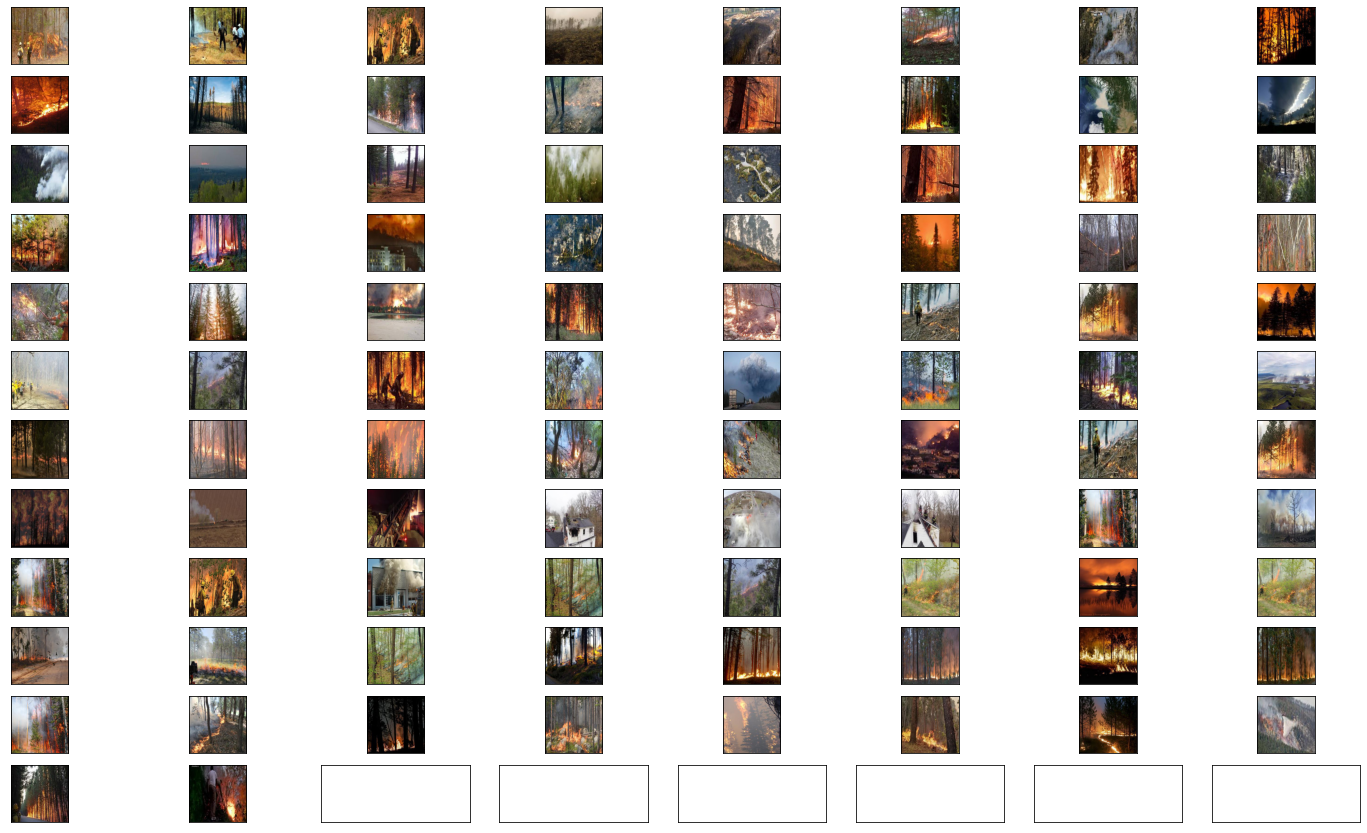

In [ ]:
from math import ceil

ncols = 8

fig, axes = plt.subplots(
    nrows=ceil(len(images)/ncols),
    ncols=ncols,
    figsize=(25, 15),
    subplot_kw={'xticks': [], 'yticks': []}
)

for i, ax in enumerate(axes.flat):
    if i == len(images):
        break
    if 'non' in images[i] or 'sat' in images[i]:
        img_dir = os.path.join(directory + NONFIRE, images[i])
        # img_dir = os.path.join(directory, images[i])
    else:
        img_dir = os.path.join(directory + FIRE, images[i])
        # img_dir = os.path.join(directory, images[i])
    image = Image.open(img_dir)
    ax.imshow(image)
    
fig.suptitle('Incorrect Predicts', fontsize=50, color='black')
plt.tight_layout()
plt.show()

In [ ]:
plt.savefig("/content/drive/MyDrive/forestfire/data/figures/incorrect-predicts.jpg")